In [11]:
# imports
from commstools.core import Signal
from commstools.impairments import add_awgn

from commstools.mapping import gray_constellation
from commstools.logger import set_log_level
from commstools.plotting import filter_response, ideal_constellation

set_log_level("WARNING")


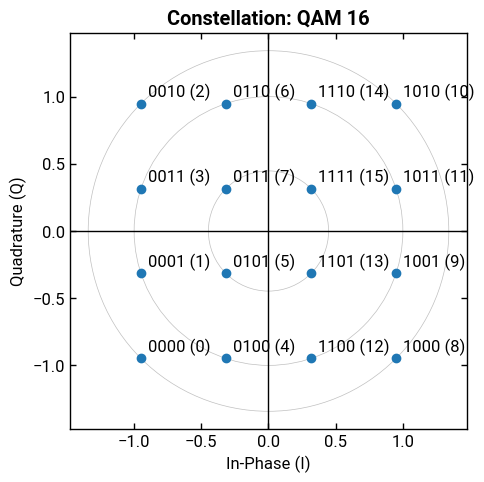

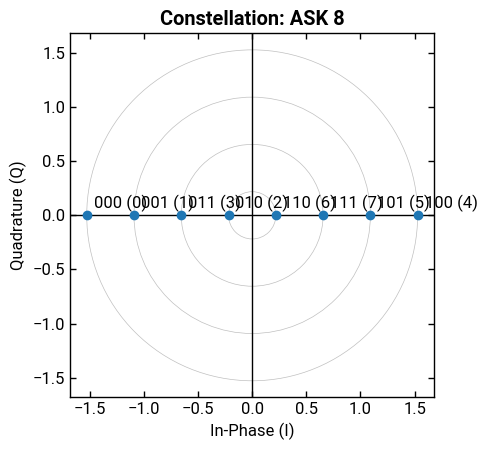

In [ ]:
ideal_constellation(modulation="qam", order=16, show=True)
ideal_constellation(modulation="ask", order=8, show=True)


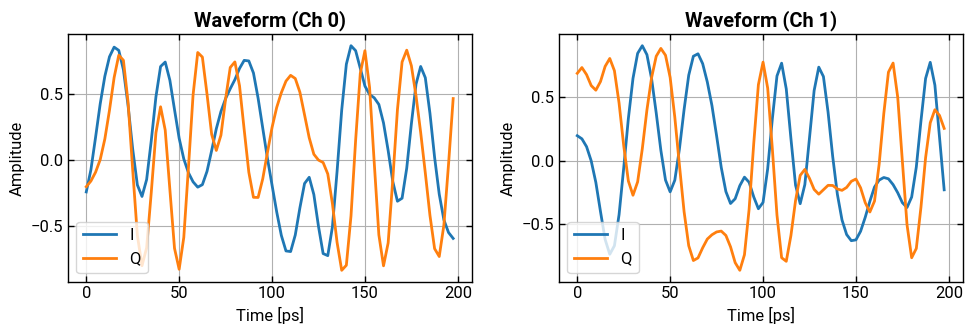

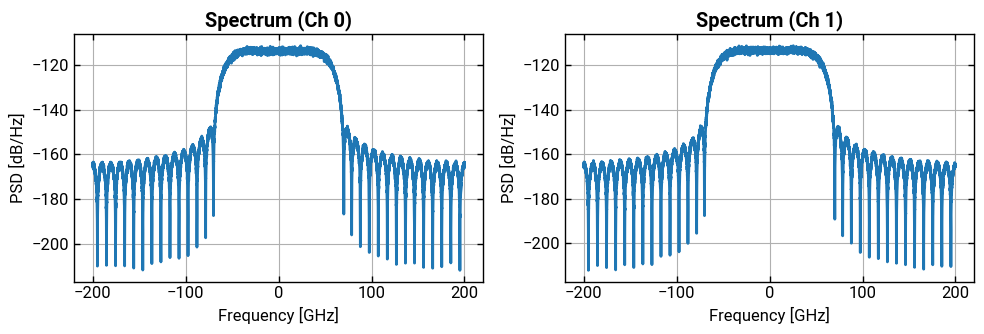

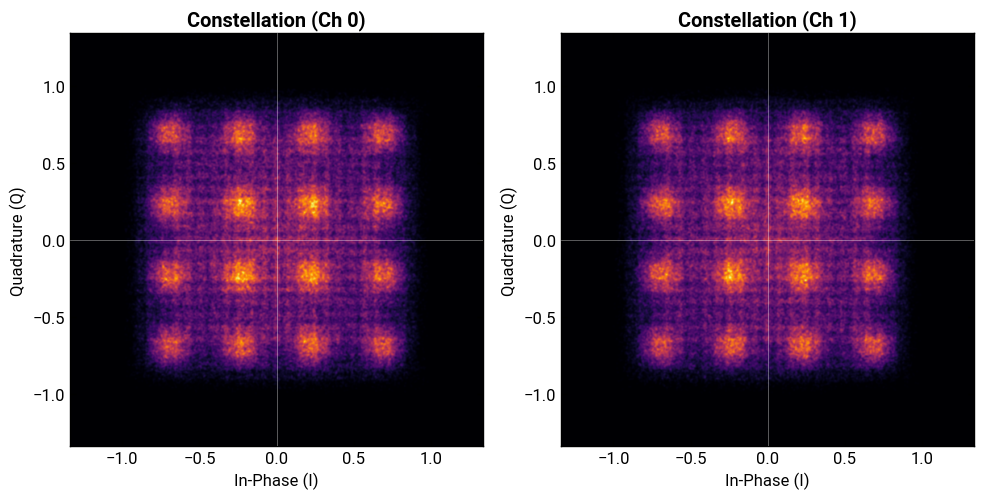

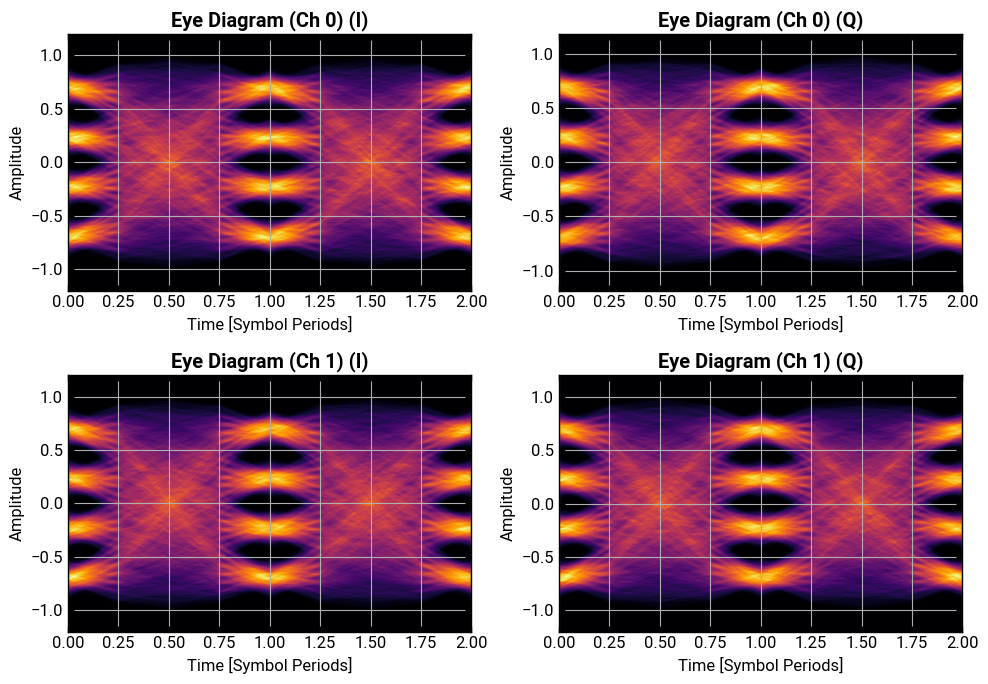

0.2953605


In [10]:
import numpy as np

symbol_rate = 100e9
sampling_rate = 400e9
sps = int(sampling_rate / symbol_rate)

sig_4qam = Signal.qam(
    order=16,
    num_symbols=100_000,
    sps=sps,
    symbol_rate=symbol_rate,
    pulse_shape="rrc",
    seed=43,
    num_streams=2,
)
sig_4qam.plot_symbols(num_symbols=20, show=True)
sig_4qam.plot_psd(show=True, nperseg=2**14)
sig_4qam.plot_constellation(show=True, overlay_ideal=False, bins=512)
sig_4qam.plot_eye(show=True)

print(np.var(sig_4qam.samples**2))


In [33]:
sig_4qam.source_symbols.shape


(2, 100000)

In [20]:
from commstools.utils import rms

print(rms(sig_4qam.source_symbols, axis=-1, keepdims=True))


[[1.       ]
 [1.0000001]]


In [ ]:
a = gray_constellation("qam", 16)


In [ ]:
import matplotlib.pyplot as plt

# plt.plot(sig_4qam.source_symbols[0, :100].get())

sig_4qam.source_symbols[0].max()


array(0.95000285+0.95000285j, dtype=complex64)

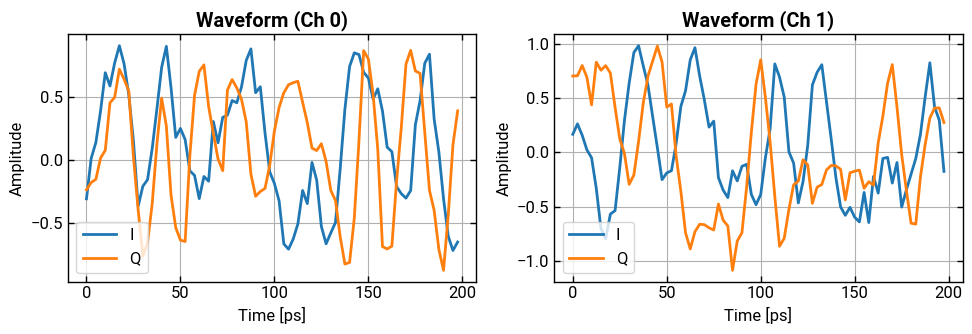

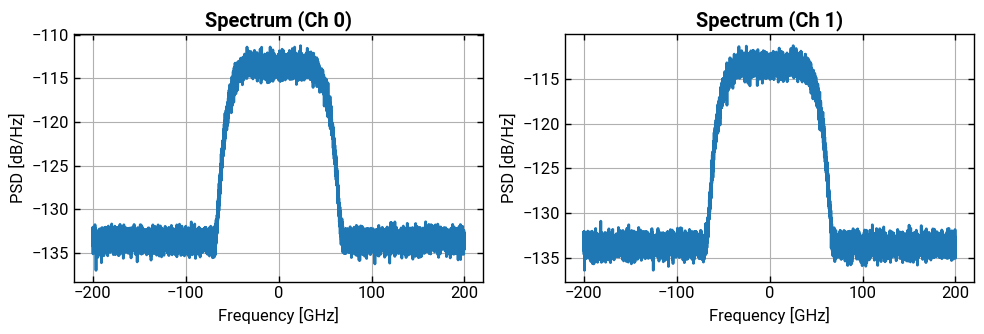

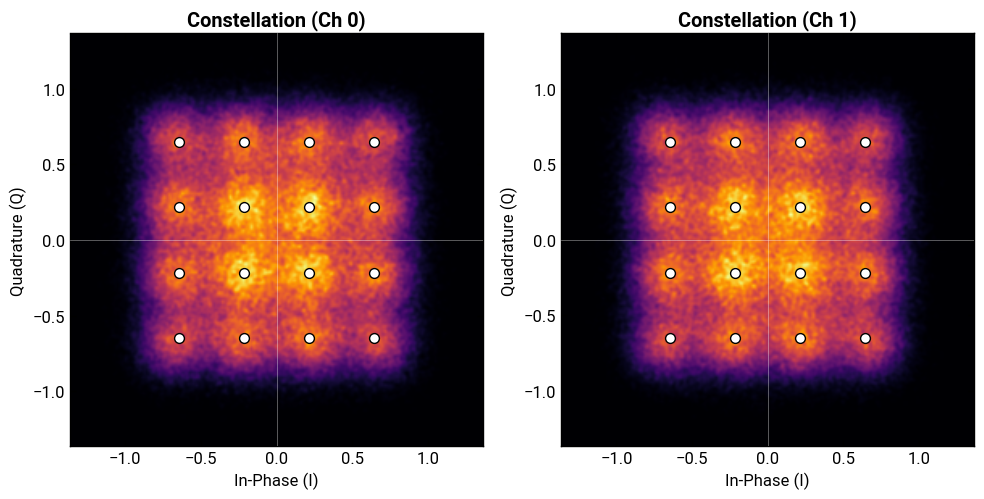

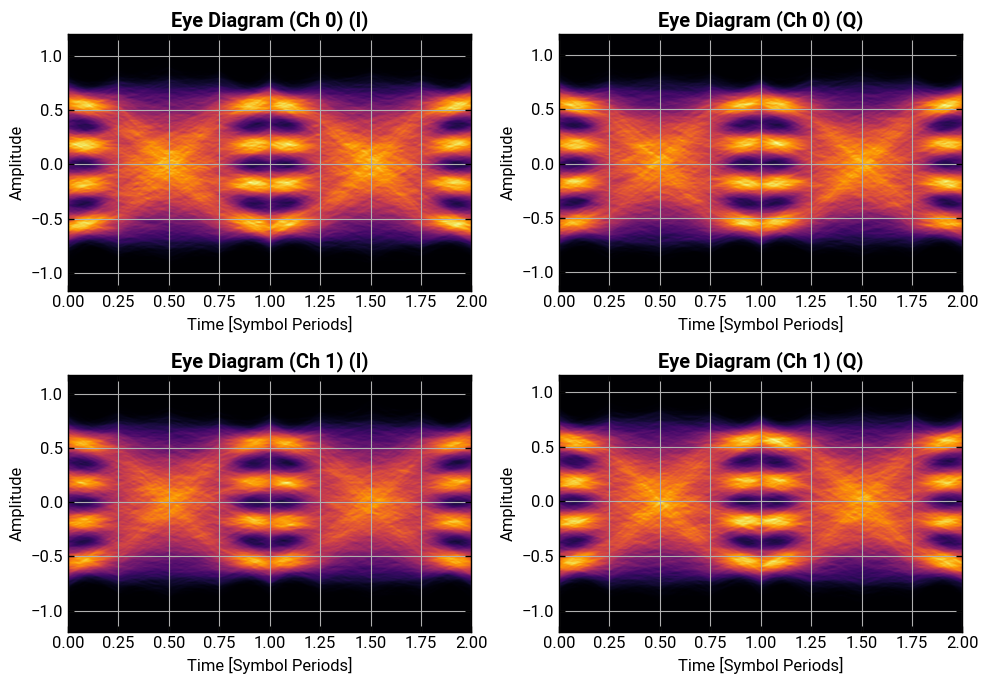

0.32797974


In [4]:
sig_4qam_n = add_awgn(sig_4qam, esn0_db=20)
sig_4qam_n.plot_symbols(num_symbols=20, show=True)
sig_4qam_n.plot_psd(show=True, nperseg=2**14)
sig_4qam_n.plot_constellation(show=True, overlay_ideal=True, bins=256)
sig_4qam_n.plot_eye(show=True)

print(np.var(sig_4qam_n.samples**2))


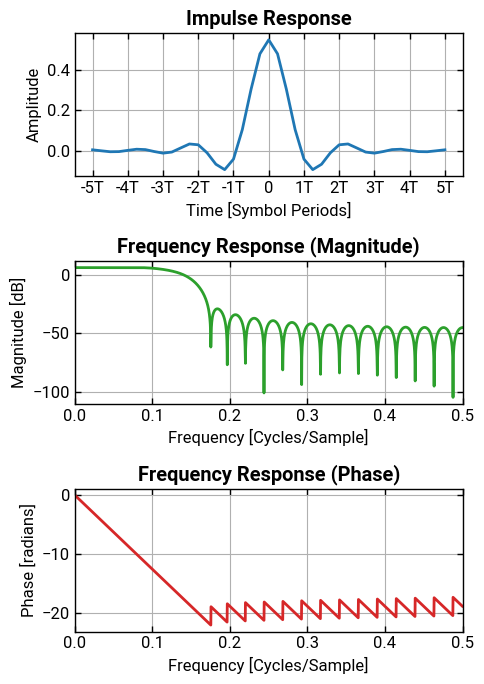

In [5]:
rrc_filter = sig_4qam_n.shaping_filter_taps()
filter_response(rrc_filter, sps=sps, show=True)


In [6]:
sig_4qam_n.matched_filter()


Signal(samples=array([[-0.18255959-0.29649685j, -0.02738072-0.35858068j,
         0.2679615 -0.30281408j, ..., -1.2538364 -0.82876991j,
        -1.00772419-0.50184319j, -0.5947399 -0.23972194j],
       [ 0.316689  +0.92013068j,  0.41573516+1.21695315j,
         0.37516701+1.38409133j, ...,  1.11349758-0.94658444j,
         0.76680175-0.65627414j,  0.40949982-0.36223889j]],
      shape=(2, 400000)), sampling_rate=400000000000.0, symbol_rate=100000000000.0, modulation_scheme='QAM', modulation_order=16, source_bits=array([[0, 1, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], shape=(2, 400000), dtype=int8), source_symbols=array([[-1.-1.j,  3.+1.j,  3.+3.j, ..., -3.+3.j,  1.-3.j, -3.-3.j],
       [ 1.+3.j, -1.+3.j, -3.+3.j, ..., -1.+3.j,  1.-1.j,  3.-3.j]],
      shape=(2, 100000), dtype=complex64), pulse_shape='rrc', spectral_domain='BASEBAND', physical_domain='DIG', center_frequency=0, digital_frequency_offset=0, filter_span=10, rrc_rolloff=0.35, rc_rolloff=0.35, gaussian_bt=0.3, smoo

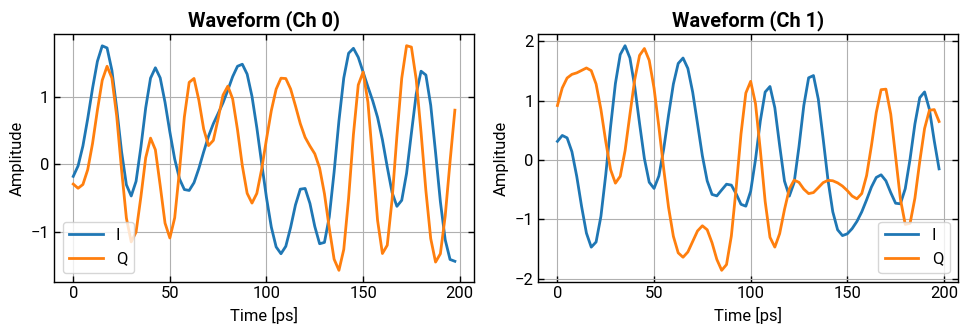

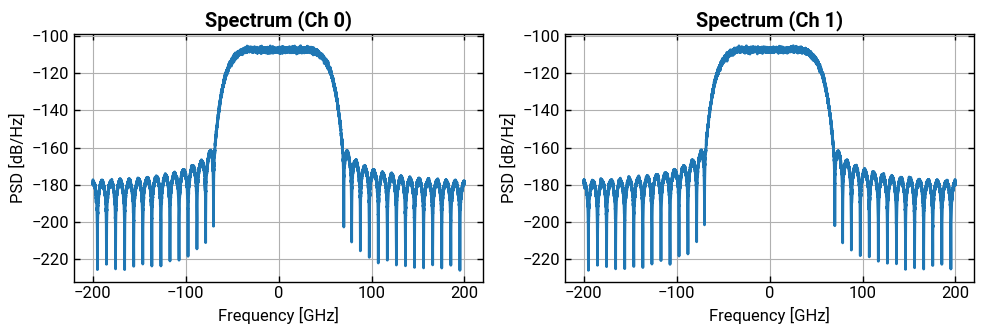

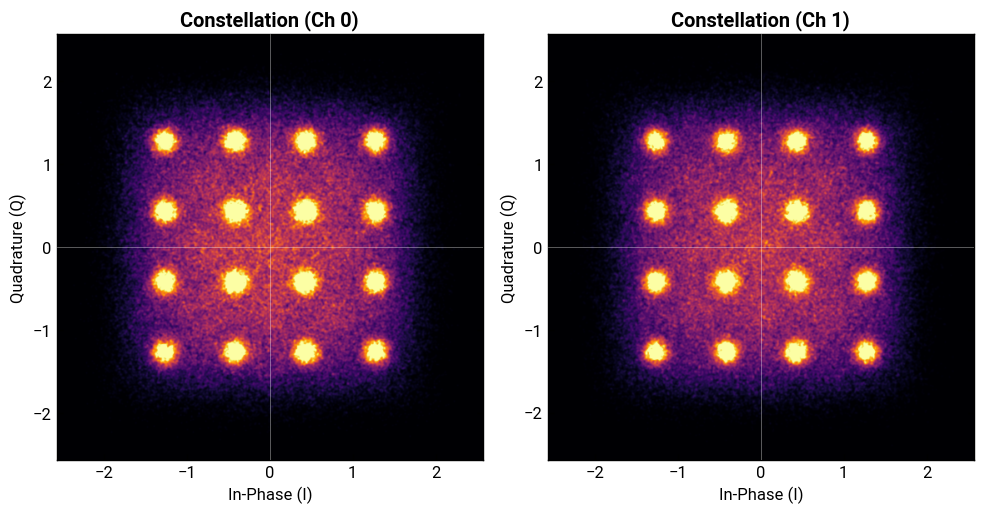

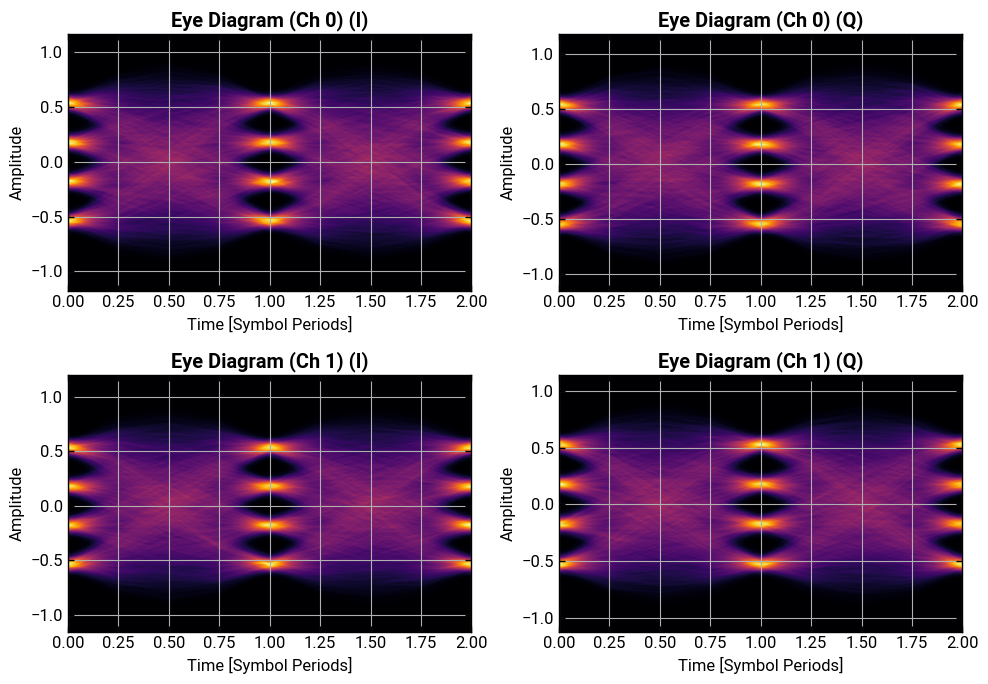

4.083242781694481


In [7]:
sig_4qam_n.plot_symbols(num_symbols=20, show=True)
sig_4qam_n.plot_psd(show=True, nperseg=2**14)
sig_4qam_n.plot_constellation(
    show=True, overlay_ideal=False, bins=512, vmin=0, vmax=0.5
)
sig_4qam_n.plot_eye(show=True)

print(np.var(sig_4qam_n.samples**2))


In [8]:
sig_4qam_n.print_info()


Property         Value
0        Spectral Domain      BASEBAND
1        Physical Domain           DIG
2      Modulation Scheme           QAM
3       Modulation Order            16
4            Symbol Rate  100.00 GBaud
5               Bit Rate   400.00 Gbps
6          Sampling Rate    400.00 GHz
7     Samples Per Symbol          4.00
8            Pulse Shape           RRC
9               Duration       1.00 µs
10      Center Frequency       0.00 Hz
11  Digital Freq. Offset       0.00 Hz
12               Backend           GPU
13         Configuration     MIMO (2x)
14         Samples Shape   (2, 400000)

For proper constellation plots, we need to resample the signal to 1 symbol per sample:

In [9]:
sig_4qam_n.downsample_to_symbols()


Signal(samples=array([[-0.18255959-0.29649685j,  1.12402141+0.30716039j,
         1.3872985 +1.27431195j, ..., -1.31405733+1.26826277j,
         0.57923749-1.32769375j, -1.18303746-1.18114664j],
       [ 0.316689  +0.92013068j, -0.27476015+1.47092556j,
        -1.38024967+1.28326724j, ..., -0.37417975+1.45355331j,
         0.43066312-0.43718599j,  1.35780058-1.15150839j]],
      shape=(2, 100000)), sampling_rate=100000000000.0, symbol_rate=100000000000.0, modulation_scheme='QAM', modulation_order=16, source_bits=array([[0, 1, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], shape=(2, 400000), dtype=int8), source_symbols=array([[-1.-1.j,  3.+1.j,  3.+3.j, ..., -3.+3.j,  1.-3.j, -3.-3.j],
       [ 1.+3.j, -1.+3.j, -3.+3.j, ..., -1.+3.j,  1.-1.j,  3.-3.j]],
      shape=(2, 100000), dtype=complex64), pulse_shape='rrc', spectral_domain='BASEBAND', physical_domain='DIG', center_frequency=0, digital_frequency_offset=0, filter_span=10, rrc_rolloff=0.35, rc_rolloff=0.35, gaussian_bt=0.3, smoo

In [10]:
sig_4qam_n.print_info()
print(np.var(sig_4qam_n.samples**2))


Property         Value
0        Spectral Domain      BASEBAND
1        Physical Domain           DIG
2      Modulation Scheme           QAM
3       Modulation Order            16
4            Symbol Rate  100.00 GBaud
5               Bit Rate   400.00 Gbps
6          Sampling Rate    100.00 GHz
7     Samples Per Symbol          1.00
8            Pulse Shape           RRC
9               Duration       1.00 µs
10      Center Frequency       0.00 Hz
11  Digital Freq. Offset       0.00 Hz
12               Backend           GPU
13         Configuration     MIMO (2x)
14         Samples Shape   (2, 100000)

4.36584854939191


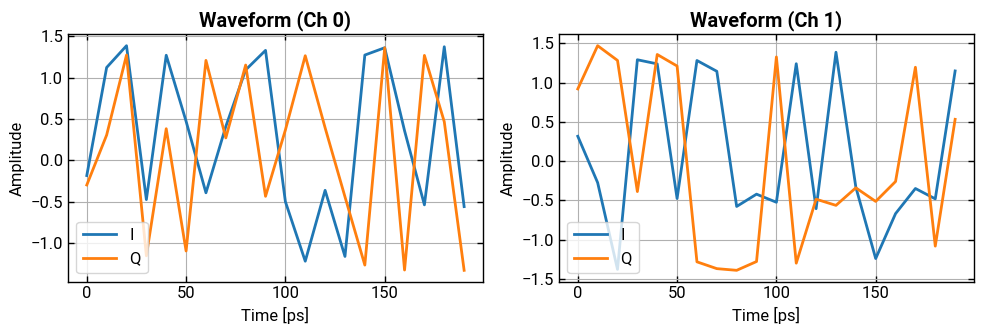

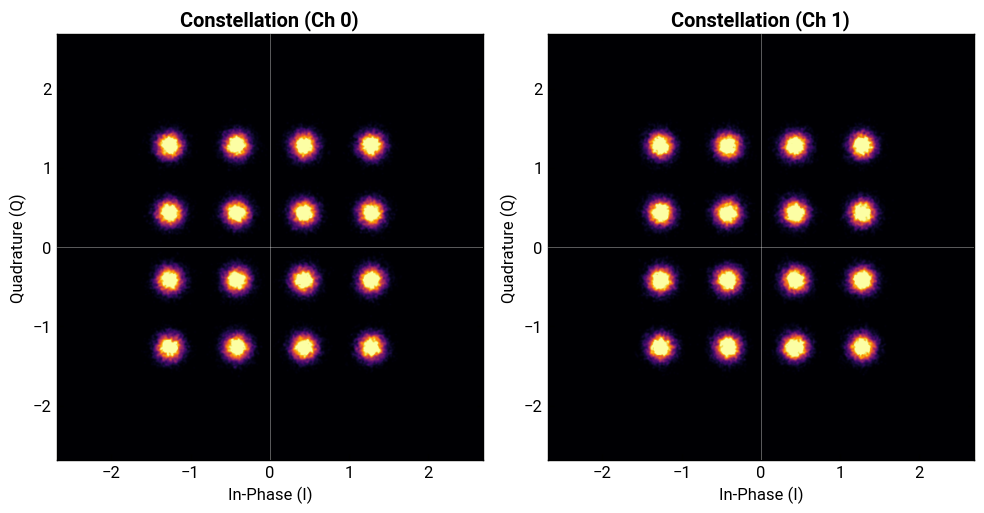

In [11]:
sig_4qam_n.plot_symbols(show=True, num_symbols=20)
sig_4qam_n.plot_constellation(
    show=True, overlay_ideal=False, bins=512, vmin=0, vmax=0.5
)


In [12]:
sig_tmp = sig_4qam_n.copy()
sig_tmp.spectral_domain = "PASSBAND"
sig_tmp.physical_domain = "OPT"
sig_tmp.center_frequency = 193.4144e12


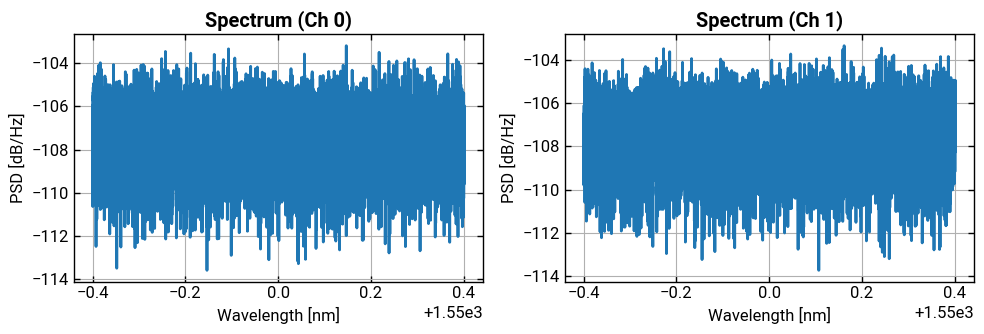

Property         Value
0        Spectral Domain      PASSBAND
1        Physical Domain           OPT
2      Modulation Scheme           QAM
3       Modulation Order            16
4            Symbol Rate  100.00 GBaud
5               Bit Rate   400.00 Gbps
6          Sampling Rate    100.00 GHz
7     Samples Per Symbol          1.00
8            Pulse Shape           RRC
9               Duration       1.00 µs
10      Center Frequency    193.41 THz
11  Digital Freq. Offset       0.00 Hz
12               Backend           GPU
13         Configuration     MIMO (2x)
14         Samples Shape   (2, 100000)

In [13]:
sig_tmp.plot_psd(show=True, x_axis="wavelength", nperseg=2**14)
sig_tmp.print_info()


In [14]:
sig_tmp = sig_4qam_n.copy()
sig_tmp.shift_frequency(30000e6)
# sig_4qam_n.resample(sps_out=2)


Signal(samples=array([[-0.18255959-0.29649685j, -0.63946861+0.97409011j,
        -0.37332629-1.84637362j, ..., -1.80856086+0.25366261j,
         0.31178583+1.41459407j, -0.75775853+1.49012987j],
       [ 0.316689  +0.92013068j, -1.31402778-0.71585343j,
         1.870931  -0.22689461j, ..., -1.15709498+0.95601199j,
        -0.0914423 +0.60682833j, -1.51473301-0.93550943j]],
      shape=(2, 100000)), sampling_rate=100000000000.0, symbol_rate=100000000000.0, modulation_scheme='QAM', modulation_order=16, source_bits=array([[0, 1, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], shape=(2, 400000), dtype=int8), source_symbols=array([[-1.-1.j,  3.+1.j,  3.+3.j, ..., -3.+3.j,  1.-3.j, -3.-3.j],
       [ 1.+3.j, -1.+3.j, -3.+3.j, ..., -1.+3.j,  1.-1.j,  3.-3.j]],
      shape=(2, 100000), dtype=complex64), pulse_shape='rrc', spectral_domain='BASEBAND', physical_domain='DIG', center_frequency=0, digital_frequency_offset=30000000000.0, filter_span=10, rrc_rolloff=0.35, rc_rolloff=0.35, gaussian_

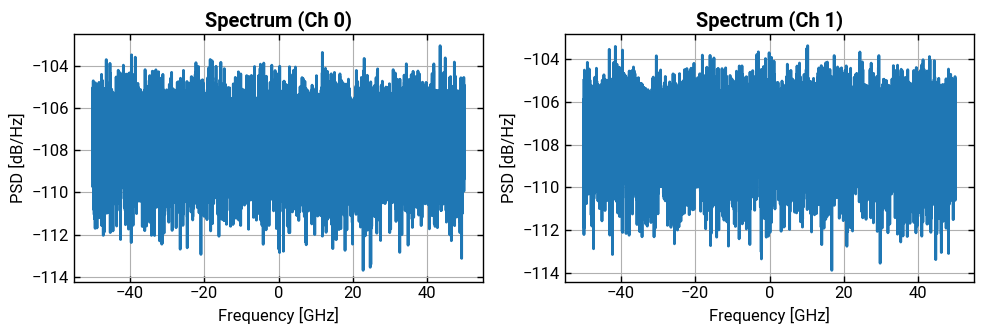

In [15]:
sig_tmp.plot_psd(show=True, nperseg=2**14)


In [16]:
sig_tmp.print_info()


Property         Value
0        Spectral Domain      BASEBAND
1        Physical Domain           DIG
2      Modulation Scheme           QAM
3       Modulation Order            16
4            Symbol Rate  100.00 GBaud
5               Bit Rate   400.00 Gbps
6          Sampling Rate    100.00 GHz
7     Samples Per Symbol          1.00
8            Pulse Shape           RRC
9               Duration       1.00 µs
10      Center Frequency       0.00 Hz
11  Digital Freq. Offset     30.00 GHz
12               Backend           GPU
13         Configuration     MIMO (2x)
14         Samples Shape   (2, 100000)

In [17]:
import numpy as np

print(np.var(sig_4qam.samples[0]))
print(np.var(sig_4qam.samples[0].real))
print(np.var(sig_4qam.samples[0].imag))


0.44768375
0.22408101
0.22360271


In [18]:
np.vdot(sig_4qam.samples[0], sig_4qam.samples[0]).real / sig_4qam.samples[0].shape[0]


array(0.44769434)

In [19]:
np.dot(sig_4qam.samples[0], sig_4qam.samples[0])


array(187.08565+109.83598j, dtype=complex64)

In [20]:
sig_4qam.samples[0].shape


(400000,)